In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import glob
from matplotlib import rc
rc('figure', figsize=(12.0, 9.0))

In [3]:
#path to azimuth and elevation files
path_az = '/Users/jeremyc/Desktop/Astro361/Lab7/sun_azimuth/'
path_el = '/Users/jeremyc/Desktop/Astro361/Lab7/sun_elevation/'

#reads all files with name 'sun' and sorts them
azimuth_files = glob.glob(path_az + "sun*")
azimuth_files.sort()
elevation_files = glob.glob(path_el + "sun*")
elevation_files.sort()

In [4]:
#reading flux into azimuth_spectra array
azimuth_spectra = []

for azimuth_file in azimuth_files:
    
    with open(azimuth_file) as azimuth_data:
        
        spectrum_rows = []
        
        for j, row in enumerate(azimuth_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as az_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
                spectrum_rows.append(row) # Throw every fourth row into our list of spectral data.
                
        tot_spectrum = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows: 
            temp_spec = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec = [] # Create an empty list to hold the spectral data
            for val in temp_spec: # Iterate over the elements of your split list.
                if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
            tot_spectrum = tot_spectrum + np.float64(spec) # Add the data from the current row to your total spectral data for this file.
            
        azimuth_spectra.append(tot_spectrum)

In [5]:
#reading flux into elevation_spectra array
elevation_spectra = []

for elevation_file in elevation_files:
    
    with open(elevation_file) as elevation_data:
        
        spectrum_rows = []
        
        for j, row in enumerate(elevation_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as az_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
                spectrum_rows.append(row) # Throw every fourth row into our list of spectral data.
                
        tot_spectrum = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows: 
            temp_spec = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec = [] # Create an empty list to hold the spectral data
            for val in temp_spec: # Iterate over the elements of your split list.
                if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
            tot_spectrum = tot_spectrum + np.float64(spec) # Add the data from the current row to your total spectral data for this file.
            
        elevation_spectra.append(tot_spectrum)

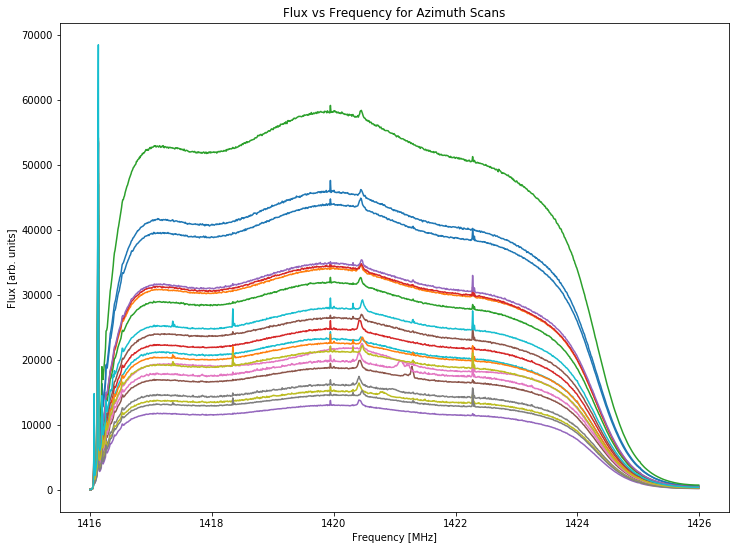

In [6]:
#define frequency range with bin width and plots all 20 spectra together
frequency = np.arange(1416,1426,0.009766)
for i in range(0,20):
     plt.plot(frequency,azimuth_spectra[i])
        
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux [arb. units]')
plt.title('Flux vs Frequency for Azimuth Scans')
plt.savefig('Flux spectra azimuth')
plt.show()

In [7]:
#using same frequency range and plots all 15 spectra together
for i in range(0,15):
     plt.plot(frequency,elevation_spectra[i])
        
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux [arb. units]')
plt.title('Flux vs Frequency for Elevation Scans')
plt.savefig('Flux spectra elevation')
plt.show()

In [8]:
#removing the spike near the beginning
#otherwise it would overestimate the integral
bad_az_int = np.trapz(azimuth_spectra,frequency)
print ('flux integral with spike = %s \n' % bad_az_int)

integral_azimuth = np.zeros(20)
for i in range(0,20):
    integral_azimuth[i] = np.trapz(azimuth_spectra[i][15:],frequency[15:]) #after 15th element, spike is removed
    
print ('good flux integral = %s \n' % integral_azimuth)

flux integral with spike = [316608.62528451 245275.98296013 229960.42673562 179014.08252243
  94248.54038096 135992.55723943 143886.91774908 117216.1251488
 110208.36067042 166830.12288448 330112.4464528  163991.30942025
 418662.27065801 247475.97022446 251561.15270952 190856.71245715
 153222.40024118 105629.64345799 154549.27595686 203141.46070645] 

good flux integral = [315368.40514725 244284.69743041 229002.37327787 177838.25397881
  93606.19426075 135065.52694069 142846.02623742 116369.646156
 109409.83025706 166330.48907038 329162.01811694 162807.49176614
 417510.41687287 246654.03880999 250692.85444139 190144.91510077
 152456.03017406 104964.81626458 153479.26199882 201646.06393973] 



/Users/jeremyc/Desktop/Astro361/Lab7/sun_azimuth/sun-1.dat
/Users/jeremyc/Desktop/Astro361/Lab7/sun_azimuth/sun-2.dat
/Users/jeremyc/Desktop/Astro361/Lab7/sun_azimuth/sun-3.dat
/Users/jeremyc/Desktop/Astro361/Lab7/sun_azimuth/sun-4.dat
/Users/jeremyc/Desktop/Astro361/Lab7/sun_azimuth/sun-5.dat
/Users/jeremyc/Desktop/Astro361/Lab7/sun_azimuth/sun-6.dat
/Users/jeremyc/Desktop/Astro361/Lab7/sun_azimuth/sun-7.dat
/Users/jeremyc/Desktop/Astro361/Lab7/sun_azimuth/sun-8.dat
/Users/jeremyc/Desktop/Astro361/Lab7/sun_azimuth/sun-9.dat
/Users/jeremyc/Desktop/Astro361/Lab7/sun_azimuth/sun0.dat
/Users/jeremyc/Desktop/Astro361/Lab7/sun_azimuth/sun1.dat
/Users/jeremyc/Desktop/Astro361/Lab7/sun_azimuth/sun10.dat
/Users/jeremyc/Desktop/Astro361/Lab7/sun_azimuth/sun2.dat
/Users/jeremyc/Desktop/Astro361/Lab7/sun_azimuth/sun3.dat
/Users/jeremyc/Desktop/Astro361/Lab7/sun_azimuth/sun4.dat
/Users/jeremyc/Desktop/Astro361/Lab7/sun_azimuth/sun5.dat
/Users/jeremyc/Desktop/Astro361/Lab7/sun_azimuth/sun6.dat
/Use

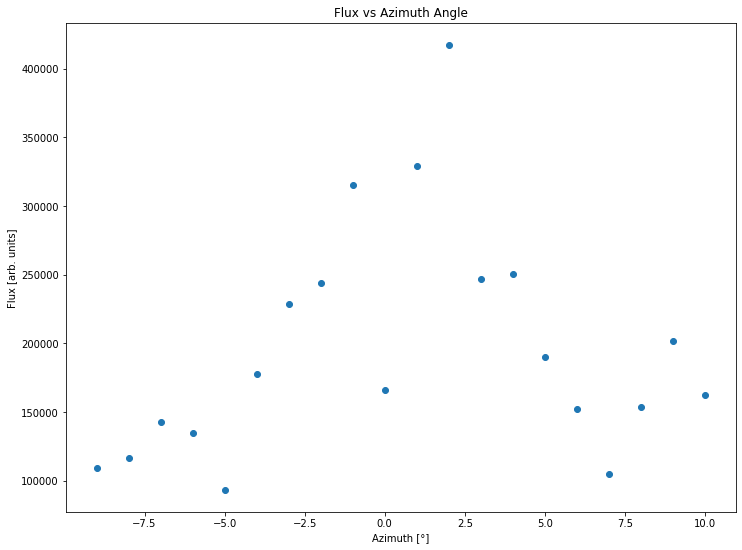

In [9]:
#plotting the corrected flux against azimuth angles in order
#this is printing out the files and they are not in order
#we want to order files by azimuth angle (-9,-8,...,9,10) for plotting later
for file in azimuth_files:
    print (file)

azimuth_angles = np.arange(-9,11)
integral_ordered_azimuth = [integral_azimuth[8],integral_azimuth[7],integral_azimuth[6],integral_azimuth[5],integral_azimuth[4],integral_azimuth[3],integral_azimuth[2],integral_azimuth[1],integral_azimuth[0],integral_azimuth[9],integral_azimuth[10],integral_azimuth[12],integral_azimuth[13],integral_azimuth[14],integral_azimuth[15],integral_azimuth[16],integral_azimuth[17],integral_azimuth[18],integral_azimuth[19],integral_azimuth[11]]

plt.scatter(azimuth_angles,integral_ordered_azimuth)
plt.xlabel('Azimuth [°]')
plt.ylabel('Flux [arb. units]')
plt.title('Flux vs Azimuth Angle')
plt.show()

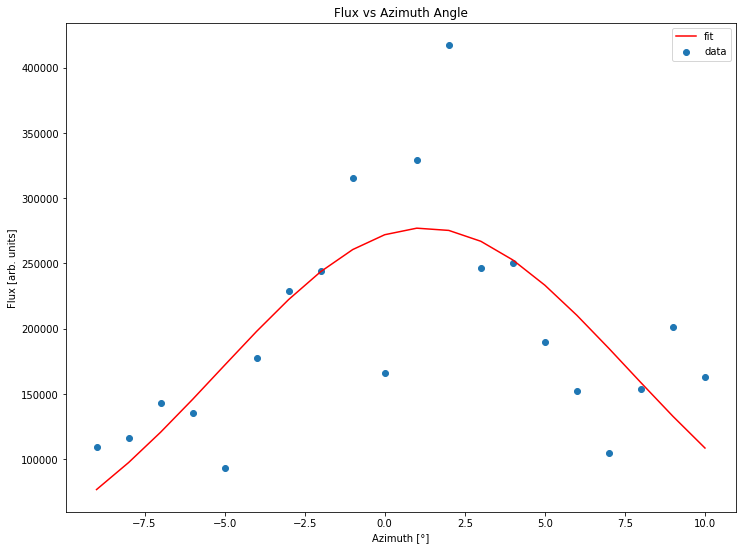

A constant = 277220.6998819723
x_0 = 1.246146974257997
sigma = 6.393166805430918

Covaraince matrix:
 [[ 5.85567308e+08 -7.94029661e+02 -1.29903684e+04]
 [-7.94029661e+02  4.49289677e-01  6.33872004e-02]
 [-1.29903684e+04  6.33872004e-02  7.16674306e-01]]

FWHM from azimuth = 15.055908°


In [10]:
#this is the gaussian curve
def Gauss(x, A, x0, sigma):
    return A * np.exp(-(x - x0)**2 / (2 * sigma**2))

#initial parameters
a = 1
b = 1
c = 1

#fitting data into our gaussian curve with initial parameters
coeffs_azumith,fiterr_azumith = curve_fit(Gauss, azimuth_angles, integral_ordered_azimuth, p0=[a, b, c])

#plotting fit and data together
plt.scatter(azimuth_angles,integral_ordered_azimuth, label='data')
plt.plot(azimuth_angles, Gauss(azimuth_angles, *coeffs_azumith), 'r-', label='fit')
plt.legend()
plt.xlabel('Azimuth [°]')
plt.ylabel('Flux [arb. units]')
plt.title('Flux vs Azimuth Angle')
plt.savefig('fit azimuth')
plt.show()

#returned best fit and errors
print ('A constant =',coeffs_azumith[0])
print ('x_0 =',coeffs_azumith[1])
print ('sigma =',coeffs_azumith[2])
print ('\nCovaraince matrix:\n',fiterr_azumith)

#FWHM is related to the standard deviation
FWHM_azimuth = 2.355*coeffs_azumith[2]
print ('\nFWHM from azimuth = %f°' % FWHM_azimuth)

In [11]:
#removing the spike near the beginning
#otherwise it would overestimate the integral
bad_el_int = np.trapz(elevation_spectra,frequency)
print ('flux integral with spike = %s \n' % bad_el_int)

integral_elevation = np.zeros(15)
for i in range(0,15):
    integral_elevation[i] = np.trapz(elevation_spectra[i][15:],frequency[15:])
    
print ('good flux integral = %s \n' % integral_elevation)

flux integral with spike = [100099.93568597  54183.38104966  78723.55365859  84545.02566127
  43217.22294399 135643.01216214  40509.12020198 186078.07964834
 149727.14084775 141317.76021541  81032.39283705  95382.10068046
  76228.46142009  37964.89343519  46027.70183389] 

good flux integral = [ 99760.87800358  53901.55147294  78313.57617778  83934.94145857
  42900.74868736 135254.17762698  40194.04029576 185563.02848442
 149326.54302398 140901.33486982  80772.73376496  95002.3557912
  75820.63123853  37717.66916187  45687.35942931] 



/Users/jeremyc/Desktop/Astro361/Lab7/sun_elevation/sun_el_-1
/Users/jeremyc/Desktop/Astro361/Lab7/sun_elevation/sun_el_-2
/Users/jeremyc/Desktop/Astro361/Lab7/sun_elevation/sun_el_-3
/Users/jeremyc/Desktop/Astro361/Lab7/sun_elevation/sun_el_-4
/Users/jeremyc/Desktop/Astro361/Lab7/sun_elevation/sun_el_-5
/Users/jeremyc/Desktop/Astro361/Lab7/sun_elevation/sun_el_1
/Users/jeremyc/Desktop/Astro361/Lab7/sun_elevation/sun_el_10
/Users/jeremyc/Desktop/Astro361/Lab7/sun_elevation/sun_el_2
/Users/jeremyc/Desktop/Astro361/Lab7/sun_elevation/sun_el_3
/Users/jeremyc/Desktop/Astro361/Lab7/sun_elevation/sun_el_4
/Users/jeremyc/Desktop/Astro361/Lab7/sun_elevation/sun_el_5
/Users/jeremyc/Desktop/Astro361/Lab7/sun_elevation/sun_el_6
/Users/jeremyc/Desktop/Astro361/Lab7/sun_elevation/sun_el_7
/Users/jeremyc/Desktop/Astro361/Lab7/sun_elevation/sun_el_8
/Users/jeremyc/Desktop/Astro361/Lab7/sun_elevation/sun_el_9


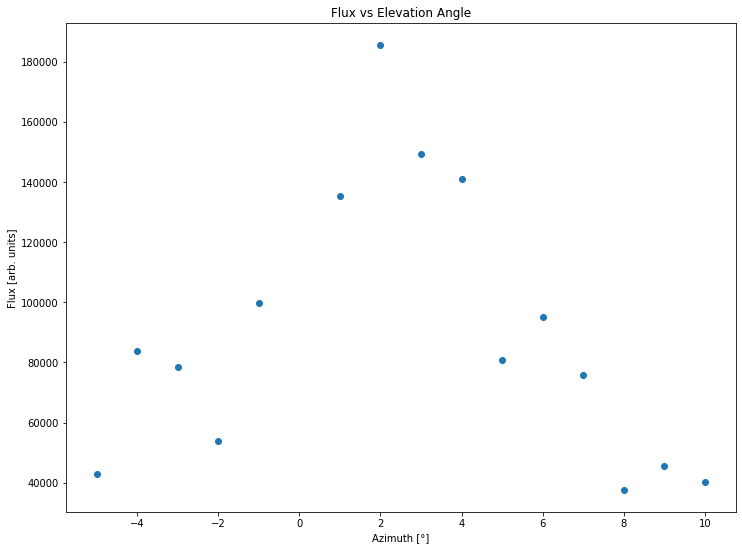

In [12]:
#plotting the corrected flux against azimuth angles in order
#this is printing out the files and they are not in order
#we want to order files by azimuth angle (-5,-4,...,9,10) for plotting later
for file in elevation_files:
    print (file)
    
elevation_angles = [-5,-4,-3,-2,-1,1,2,3,4,5,6,7,8,9,10]

integral_ordered_elevation = [integral_elevation[4],integral_elevation[3],integral_elevation[2],integral_elevation[1],integral_elevation[0],integral_elevation[5],integral_elevation[7],integral_elevation[8],integral_elevation[9],integral_elevation[10],integral_elevation[11],integral_elevation[12],integral_elevation[13],integral_elevation[14],integral_elevation[6]]

plt.scatter(elevation_angles,integral_ordered_elevation)
plt.xlabel('Azimuth [°]')
plt.ylabel('Flux [arb. units]')
plt.title('Flux vs Elevation Angle')
plt.show()

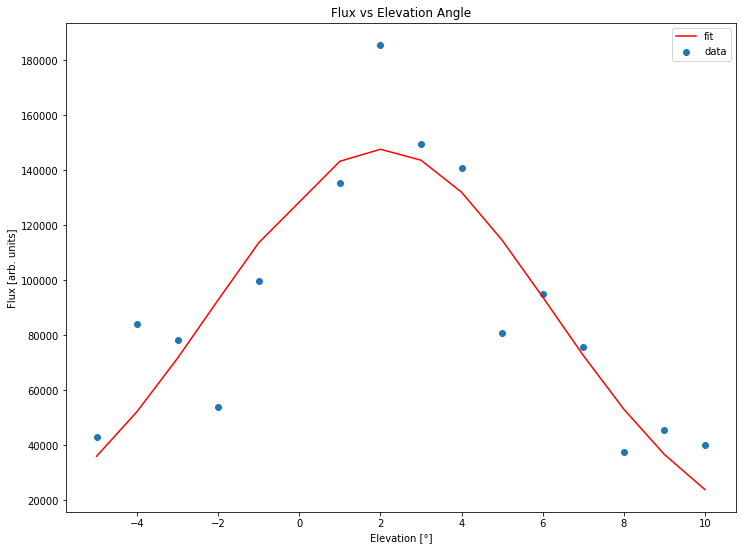

A constant = 147591.20137494913
x_0 = 2.022865008565677
sigma = 4.181072942881992

Covaraince matrix:
 [[ 1.25172754e+08 -2.54811490e+02 -2.63176455e+03]
 [-2.54811490e+02  1.26695690e-01 -2.14720832e-03]
 [-2.63176455e+03 -2.14720832e-03  1.49514645e-01]]

FWHM from azimuth = 9.846427°


In [13]:
#using same gaussian curve and initia parameters
a = 1
b = 1
c = 1

#fitting data into our gaussian curve with initial parameters
coeffs_elevation,fiterr_elevation = curve_fit(Gauss, elevation_angles, integral_ordered_elevation, p0=[a, b, c])

#plotting fit and data together
plt.scatter(elevation_angles,integral_ordered_elevation, label='data')
plt.plot(elevation_angles, Gauss(elevation_angles, *coeffs_elevation), 'r-', label='fit')
plt.legend()
plt.xlabel('Elevation [°]')
plt.ylabel('Flux [arb. units]')
plt.title('Flux vs Elevation Angle')
plt.savefig('fit elevation')
plt.show()

#returned best fit and errors
print ('A constant =',coeffs_elevation[0])
print ('x_0 =',coeffs_elevation[1])
print ('sigma =',coeffs_elevation[2])
print ('\nCovaraince matrix:\n',fiterr_elevation)

#FWHM is related to the standard deviation

FWHM_elevation = 2.355*coeffs_elevation[2]
print ('\nFWHM from azimuth = %f°' % FWHM_elevation)